<a href="https://colab.research.google.com/github/Saramohamed188/repoo/blob/master/Another_copy_of_usingfilters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
from sklearn.cluster import KMeans , DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


In [40]:

trip_data = pd.read_csv('/content/Tripdata.csv')
user_favorites = pd.read_csv('/content/userdata.csv')

In [41]:
trip_data.dropna(inplace=True)
user_favorites.dropna(inplace=True)
trip_data['Place'] = trip_data['Place'].str.replace(' ', '')

In [42]:
encoder = LabelEncoder()
trip_data['Place_encoded'] = encoder.fit_transform(trip_data['Place'])
features = trip_data[['price', 'days', 'Place_encoded']]


In [43]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

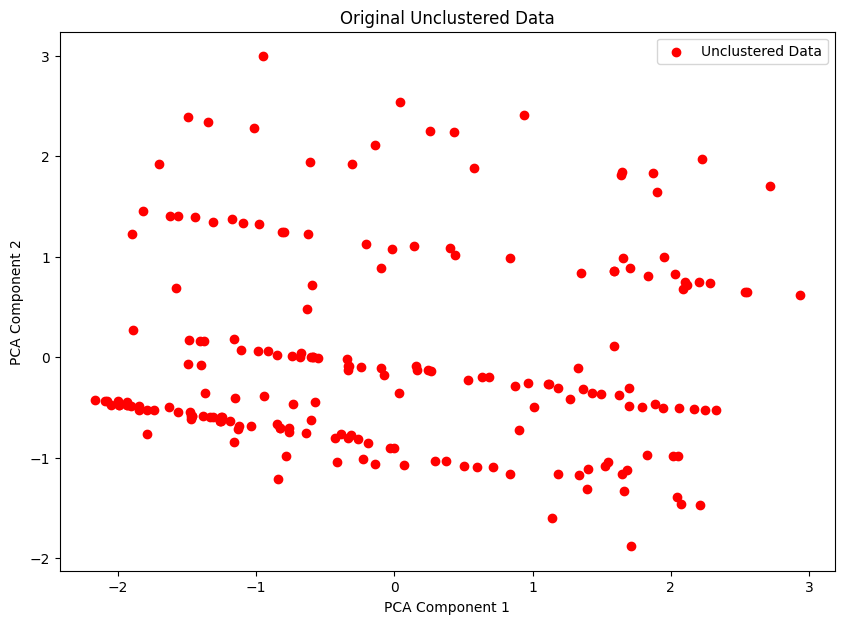

In [44]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 7))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c='red', label='Unclustered Data')
plt.title('Original Unclustered Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [45]:
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

In [46]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    davies_bouldin_avg = davies_bouldin_score(scaled_features, cluster_labels)
    calinski_harabasz_avg = calinski_harabasz_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    davies_bouldin_scores.append(davies_bouldin_avg)
    calinski_harabasz_scores.append(calinski_harabasz_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [47]:
print(f'Silhouette Score: {max(silhouette_scores):.4f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg:.4f}')

Silhouette Score: 0.4594
Calinski-Harabasz Index: 175.6198


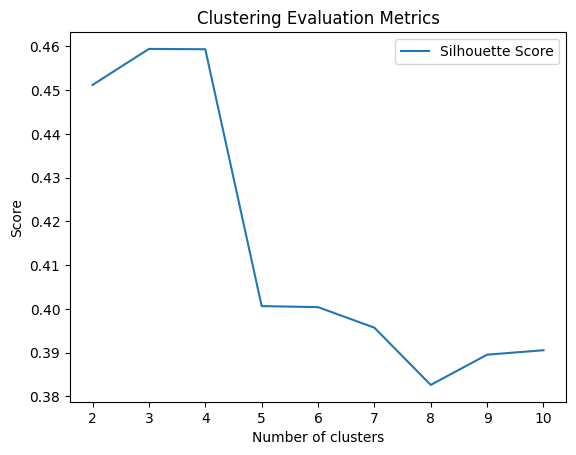

In [48]:
plt.plot(range(2, 11), silhouette_scores, label='Silhouette Score')
plt.title('Clustering Evaluation Metrics')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()
plt.show()



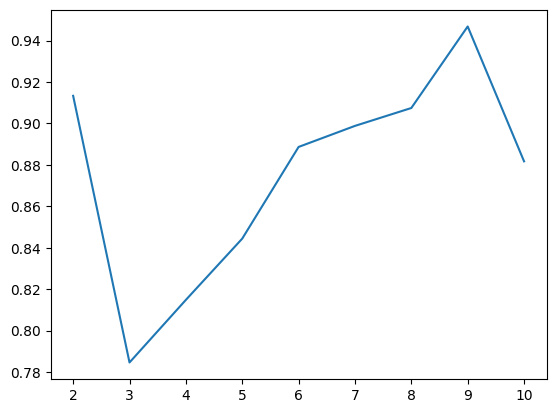

In [49]:
plt.plot(range(2, 11), davies_bouldin_scores, label='Davies-Bouldin Index')


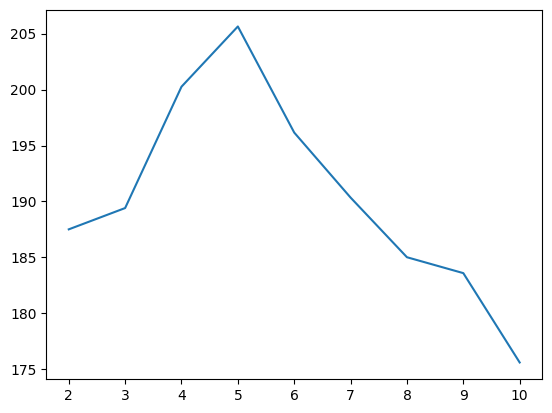

In [50]:
plt.plot(range(2, 11), calinski_harabasz_scores, label='Calinski-Harabasz Index')

In [51]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
trip_data['cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


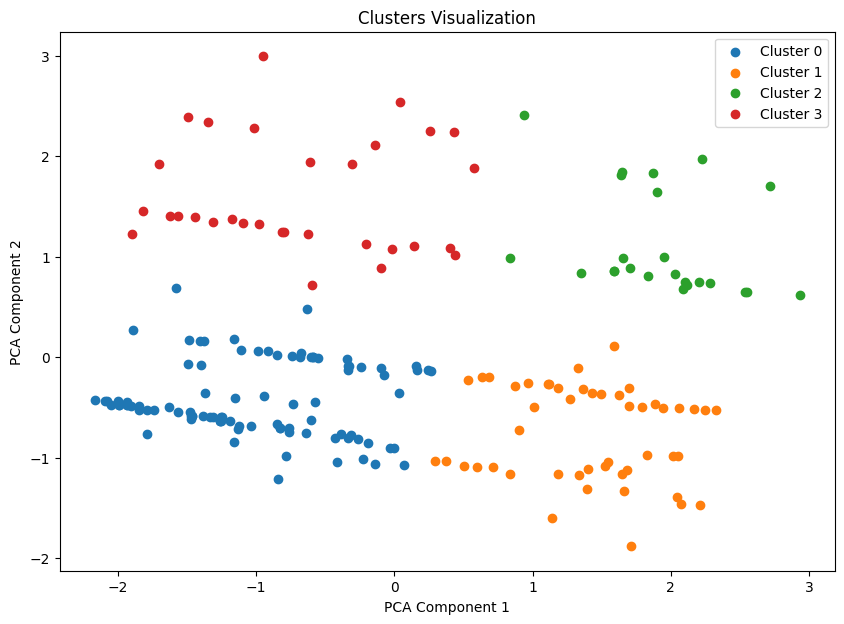

In [52]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    plt.scatter(pca_components[cluster_labels == cluster, 0], pca_components[cluster_labels == cluster, 1], label=f'Cluster {cluster}')

plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [53]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels_dbscan = dbscan.fit_predict(scaled_features)

In [54]:
mask = cluster_labels_dbscan != -1
silhouette_avg_dbscan = silhouette_score(scaled_features[mask], cluster_labels_dbscan[mask]) if np.any(mask) else -1
davies_bouldin_avg_dbscan = davies_bouldin_score(scaled_features[mask], cluster_labels_dbscan[mask]) if np.any(mask) else -1
calinski_harabasz_avg_dbscan = calinski_harabasz_score(scaled_features[mask], cluster_labels_dbscan[mask]) if np.any(mask) else -1

print(f'DBSCAN Silhouette Score: {silhouette_avg_dbscan:.4f}')
print(f'DBSCAN Calinski-Harabasz Index: {calinski_harabasz_avg_dbscan:.4f}')


DBSCAN Silhouette Score: 0.1779
DBSCAN Calinski-Harabasz Index: 31.3385


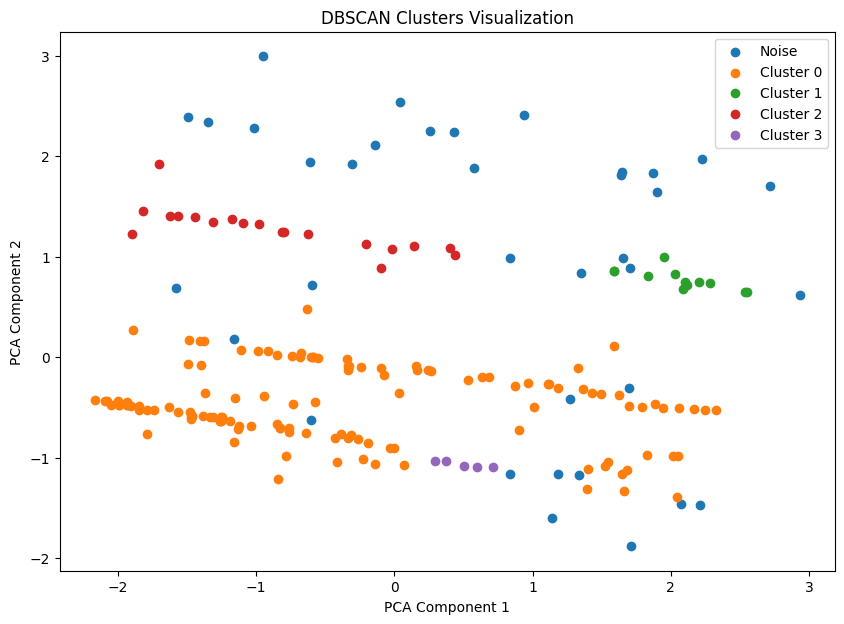

In [55]:
trip_data['cluster_dbscan'] = cluster_labels_dbscan

pca_components_dbscan = pca.fit_transform(scaled_features)
plt.figure(figsize=(10, 7))
for cluster in np.unique(cluster_labels_dbscan):
    if cluster == -1:
        label = 'Noise'
    else:
        label = f'Cluster {cluster}'
    plt.scatter(pca_components_dbscan[cluster_labels_dbscan == cluster, 0], pca_components_dbscan[cluster_labels_dbscan == cluster, 1], label=label)

plt.title('DBSCAN Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [57]:
def plot_clusters(cluster_labels, title):
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(scaled_features)
    plt.figure(figsize=(10, 7))
    for cluster in np.unique(cluster_labels):
        plt.scatter(pca_components[cluster_labels == cluster, 0], pca_components[cluster_labels == cluster, 1], label=f'Cluster {cluster}')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

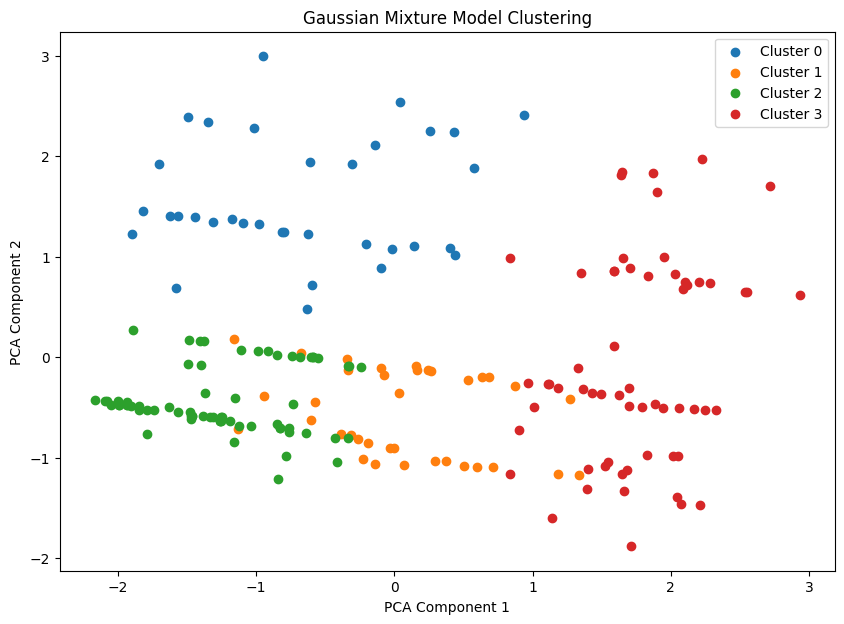

GMM Silhouette Score: 0.3310


In [58]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(scaled_features)
plot_clusters(gmm_labels, 'Gaussian Mixture Model Clustering')
print(f'GMM Silhouette Score: {silhouette_score(scaled_features, gmm_labels):.4f}')

In [ ]:
def recommend_trips(user_id, num_recommendations=10):
    user_likes = user_favorites[user_favorites['User_id'] == user_id]['trip_id']
    user_preferences = trip_data[trip_data['trip_id'].isin(user_likes)]

    if user_preferences.empty:
        return pd.DataFrame()

    preferred_price_min = user_preferences['price'].min()
    preferred_price_max = user_preferences['price'].max()
    preferred_days_min = user_preferences['days'].min()
    preferred_days_max = user_preferences['days'].max()

    user_cluster = kmeans.predict(scaler.transform(user_preferences[['price', 'days', 'Place_encoded']]))
    similar_trips = trip_data[trip_data['cluster'].isin(user_cluster)]

    filtered_trips = similar_trips[
        (similar_trips['price'] >= preferred_price_min) &
        (similar_trips['price'] <= preferred_price_max) &
        (similar_trips['days'] >= preferred_days_min) &
        (similar_trips['days'] <= preferred_days_max)
    ]

    recommended_trips = filtered_trips[~filtered_trips['trip_id'].isin(user_likes)]

    if len(recommended_trips) > num_recommendations:
        recommended_trips = recommended_trips.sample(n=num_recommendations, random_state=42)

    return recommended_trips



In [ ]:
user_id = 333
recommended_trips_for_user_333 = recommend_trips(user_id)
print("Recommended trips for User 777:")
print(recommended_trips_for_user_333[['trip_id', 'price', 'Place', 'days']])

Recommended trips for User 777:
                      trip_id  price   Place  days
21           7c8d9e0f1a2b3c4d   5050   Cairo     5
75   1a3b2c4d5e6f7a8d9b0c1e2f   5050   Luxor     8
108           7c8d9e0f1a2b3c4   4250   Luxor     6
137            8c9d0e1f2a3b4c   4650   Cairo     8
154             1c2d3e4f5a6b7   4850   Luxor     6
160             5c6d7e8f9a0b1   4450   Luxor     8
172             3e4f5a6b7c8d9   4900  RedSea     7
197             8c9d0e1f2a3b4   4300   Cairo     7
